### 2d

In [1]:
import os
import sys
import inspect

from IPython.display import display

# insert hybriddomain dir into sys
# hybriddomain must contain envs folder:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
hd = currentdir.find("envs")
print(currentdir[:hd])
sys.path.insert(0, currentdir[:hd])

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/


### Изменение блока

##### Загрузка шаблона

In [2]:
from envs.hs.model.model_main import ModelNet as Model

m = Model()
m.io.loadFromFile('../../../tests/test2d_for_intervals_single_delay.json')
b = m.blocks[0]

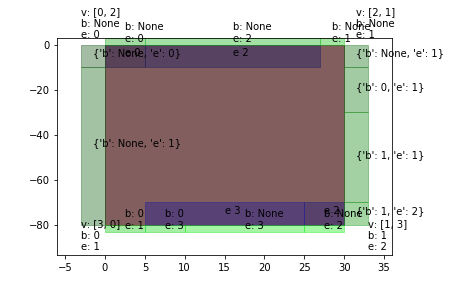

In [3]:
b.plotter.plot().show()

##### Изменение стороны блока

In [4]:
display(b.sides[0].__repr__(notebook=True))

,0,1
bound/eq,"(None, 0)","(None, 1)"
range,"[0.0, 1.0]","[1.0, 8.0]"


Для изменения стороны нужно создать новую:

In [5]:
from math_space.pde.regions import BoundRegion, EquationRegion
from envs.hs.block.side.side_main import SideNet as Side

# create side 2:
b00 = BoundRegion(Side=2, BoundNumber=0, dim=2,
                  xfrom=0, xto=0.3, yfrom=0, yto=0.5)
b01 = BoundRegion(Side=2, BoundNumber=1, dim=2,
                  xfrom=0.3, xto=0.7, yfrom=0, yto=0.5)
s2 = Side(2, bRegions=[b00, b01])


Для добавления стороны `block.editor.add_or_edit_side(side)`.
<br>Результат:

In [6]:
# TODO impossible remove regions
# change side 0:
display("before:")
display(b.sides[2].__repr__(notebook=True))

display("side:")
display(s2.__repr__(notebook=True))

# replace current side 2:
b.editor.add_or_edit_side(s2)

display("after:")
display(b.sides[2].__repr__(notebook=True))

'before:'

,0,1,2
bound/eq,"(None, 0)","(None, 2)","(None, 1)"
range,"[0.0, 0.5]","[0.5, 2.7]","[2.7, 3.0]"


'side:'

,0,1
bound/eq,"(0, 0)","(1, 0)"
range,"[0.0, 0.3]","[0.3, 0.7]"


'after:'

,0,1,2,3,4
bound/eq,"(0, 0)","(1, 0)","(1, 2)","(None, 2)","(None, 1)"
range,"[0.0, 0.3]","[0.3, 0.5]","[0.5, 0.7]","[0.7, 2.7]","[2.7, 3.0]"


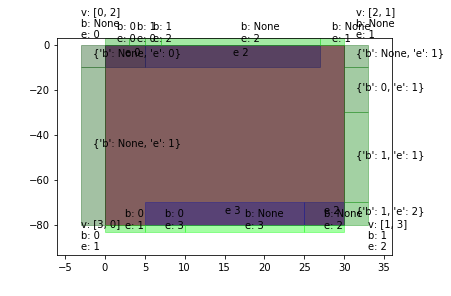

In [7]:
b.plotter.plot().show()

##### Добавление граничного региона

На предыдущем шаге вместе с стороной 2 добавилисть ее регионы (перезаписаны)

In [8]:
# boud regions for side 2 
for bRegion in b.boundRegions[2]:
    print(bRegion)


   from   to
x     0  0.3
y     0  0.5
side_num: 2 
boundNumber: 0

   from   to
x   0.3  0.7
y   0.0  0.5
side_num: 2 
boundNumber: 1



Регионы совподают на стороне 2 и блоке:

In [9]:
print(b.boundRegions[2] == s2.bRegions) 

True


Добавление нового региона для стороны 0:

In [10]:
b00 = BoundRegion(BoundNumber=0, Side=0, dim=2,
                  xfrom=0, xto=0.5, yfrom=0.3, yto=0.7)

# add bound region to side 0:
display("before:")
display(b.sides[0].__repr__(notebook=True))
b.editor.add_bound_region(b00)
display("after:")
display(b.sides[0].__repr__(notebook=True))

'before:'

,0,1
bound/eq,"(None, 0)","(None, 1)"
range,"[0.0, 1.0]","[1.0, 8.0]"


'after:'

,0,1,2,3
bound/eq,"(None, 0)","(0, 0)","(None, 0)","(None, 1)"
range,"[0.0, 0.3]","[0.3, 0.7]","[0.7, 1.0]","[1.0, 8.0]"


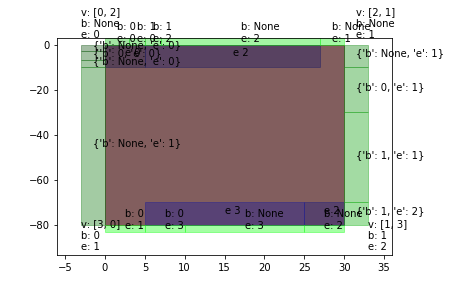

In [11]:
b.plotter.plot().show()

### Добавление интерконнекта

##### Загрузка шаблона

In [12]:
m1 = Model()
m1.io.loadFromFile('../../../tests/test2d_two_blocks0.json')


DefaultBound not set
DefaultBound not set
obj alredy exist:

ic: simple connection
blockNumber1: 0
blockNumber2: 1
block1Side: 2
block2Side: 3



Существующий интерконнект:

b1: [30.0, 20.0]
b2: [50.0, 70.0]
s: [100.0, 140.0]
case 2: block1Side 2, block2Side 3
offset relative block 1
orign_1: [0, -20.0]
orign_2: [15.0, 0]


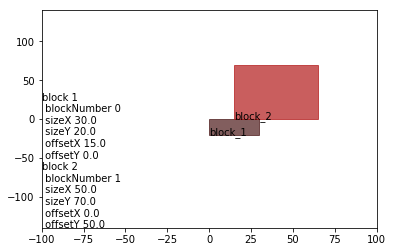

In [13]:
ic = m1.interconnects[0]
ic.plotter.plot().show()

##### Добавление нового блока

Создание бока

In [14]:
from math_space.pde.regions import BoundRegion, EquationRegion
from envs.hs.block.side.side_main import SideNet as Side
from envs.hs.block.block_size import BlockSize
from envs.hs.block.block_main import BlockNet as Block

# add side 0
b00 = BoundRegion(BoundNumber=0, Side=0, dim=2,
                  xfrom=0, xto=0.5, yfrom=0, yto=0.5)
b01 = BoundRegion(BoundNumber=1, Side=0, dim=2,
                  xfrom=0.5, xto=1, yfrom=0, yto=0.5)
s0 = Side(0, bRegions=[b00, b01])

# add side 1
b10 = BoundRegion(BoundNumber=0, dim=2, Side=1,
                  xfrom=0, xto=0.5, yfrom=0, yto=0.5)
b11 = BoundRegion(BoundNumber=1, dim=2, Side=1,
                  xfrom=0.5, xto=1, yfrom=0, yto=0.5)
s1 = Side(1, bRegions=[b10, b11])

# add side 2
b20 = BoundRegion(BoundNumber=0, dim=2, Side=2,
                  xfrom=0, xto=0.5, yfrom=0, yto=0.5)
b21 = BoundRegion(BoundNumber=1, dim=2, Side=2,
                  xfrom=0.5, xto=1, yfrom=0, yto=0.5)
s2 = Side(2, bRegions=[b20, b21])

# add side 3
b30 = BoundRegion(BoundNumber=0, dim=2, Side=3,
                  xfrom=0, xto=0.5, yfrom=0, yto=0.5)
b31 = BoundRegion(BoundNumber=1, dim=2, Side=3,
                  xfrom=0.5, xto=1, yfrom=0, yto=0.5)
s3 = Side(3, bRegions=[b30, b31])

# add eq region:
e0 = EquationRegion(dim=2, EquationNumber=1,
                    xfrom=0.1, xto=0.2,
                    yfrom=0.1, yto=0.2)

# add size of block:
size = BlockSize()
size.set_default(dimension=2)

# create block:
b = Block(name="Block 1", size=size, sides=[s0, s1, s2, s3],
          eRegions=[e0])


Добавление нового блока

In [15]:
m.editor.add_block(b)

In [16]:
b.num

1

##### Добавление нового интерконнекта

In [17]:
from envs.hs.interconnect.ic_main import icMain as Interconnect

ic = Interconnect("1", model=m,
                  blockNumber1=0, blockNumber2=1,
                  block1Side=0, block2Side=1)

In [18]:
len(m.interconnects)

1

b1: [30.0, 80.0]
b2: [10.0, 10.0]
s: [60.0, 160.0]
case 0: block1Side 0, block2Side 1
orign_1: [0, 0]
orign_2: [-10.0, 40.0]


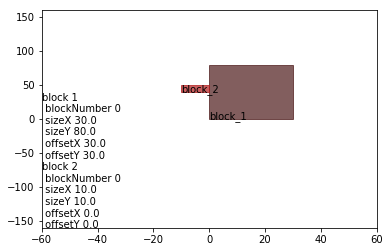

In [19]:
ic.plotter.plot().show()